In [25]:
from utils import download_pdf_wget, download_pdf_requests
from utils import extract_text_with_langchain, extract_target_from_filename, generate_backup_filename,extract_text_with_backup
from utils import preprocess_text, truncate_text
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import joblib

In [2]:
excel_path = 'data/DataSet.xlsx'
sheet_name = 'train_data' 
url_column = 'datasheet_link'


In [3]:
data = pd.read_excel(excel_path, sheet_name=sheet_name)
data.head()

,datasheet_link,target_col
0,https://lfillumination.com/files/specsheets/EF...,lighting
1,https://lfillumination.com/files/specsheets/EF...,lighting
2,https://lfillumination.com/files/specsheets/EF...,lighting
3,https://www.waclighting.com/storage/waclightin...,lighting
4,https://www.acuitybrands.com/api/products/geta...,lighting


In [4]:
# Load the Excel file as a DataFrame
file_path = 'data/DataSet.xlsx'
sheet_name = 'train_data'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.shape

(2570, 2)

In [3]:
df.head()

,datasheet_link,target_col
0,https://lfillumination.com/files/specsheets/EF...,lighting
1,https://lfillumination.com/files/specsheets/EF...,lighting
2,https://lfillumination.com/files/specsheets/EF...,lighting
3,https://www.waclighting.com/storage/waclightin...,lighting
4,https://www.acuitybrands.com/api/products/geta...,lighting


In [10]:
save_dir = './downloaded_train_pdfs'
os.makedirs(save_dir, exist_ok=True)
for i, row in df.iterrows():
    print(i)
    url = row['datasheet_link']
    name = row['target_col']
    if ('eaton' not in url)  :#and ('te.com' not in url)
        file_name = f"document_{i+1}_{name}.pdf"
        print(f"Processing {url}...")
        # pdf_path = download_pdf(url, save_dir, file_name)
        pdf_path = download_pdf_requests(url, save_dir, file_name)
        # if pdf_path:
        #     text = extract_text_from_pdf(pdf_path)
        #     df.at[i, 'text'] = text

0
Processing https://lfillumination.com/files/specsheets/EF408B-Light-Unit.pdf...


KeyboardInterrupt: 

In [11]:


# Load the Excel file as a DataFrame
file_path = 'data/DataSet.xlsx'
sheet_name = 'test_data'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Directory to save the downloaded PDFs
save_dir = './downloaded_test_pdfs'
os.makedirs(save_dir, exist_ok=True)



# Download PDFs and extract text
df['text'] = None  # Initialize the text column
for i, row in df.iterrows():

    url = row['datasheet_link']
    name = row['target_col']
    if ('eaton' not in url) and ('te.com' not in url):
        file_name = f"document_{i+1}_{name}.pdf"
        print(f"Processing {url}...")
        # pdf_path = download_pdf(url, save_dir, file_name)
        pdf_path = download_pdf_requests(url, save_dir, file_name)
        # if pdf_path:
        #     text = extract_text_from_pdf(pdf_path)
        #     df.at[i, 'text'] = text
        

# Save the updated DataFrame
# <!-- output_path = './processed_data_with_text.xlsx'
# df.to_excel(output_path, index=False)
# print(f"Processed data saved to {output_path}") -->


Processing https://lumenart.com/images/alume/awl-01_specs.pdf...
Processing https://lumenart.com/images/fabric/rdc/rdc_specs.pdf...


KeyboardInterrupt: 

In [12]:
import os

# Specify the directory
folder_path = './downloaded_pdfs'

# Count the total files in the folder
if os.path.exists(folder_path):
    total_files = len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])
    print(f"Total files in the folder '{folder_path}': {total_files}")
else:
    print(f"The folder '{folder_path}' does not exist.")


Total files in the folder './downloaded_pdfs': 1524


In [4]:
# from langchain.document_loaders import PyPDFLoader
# import os
# import pandas as pd

# Define folder paths
train_folder = './downloaded_train_pdfs'
backup_folder = './downloaded_pdfs'


# Initialize list to store data
data = []

# Iterate over all files in the train folder
if os.path.exists(train_folder):
    for file_name in os.listdir(train_folder):
        if file_name.endswith('.pdf'):
            print(f"Processing {file_name}...")
            text = extract_text_with_backup(file_name,train_folder,backup_folder)
            target = extract_target_from_filename(file_name)
            data.append({'file_name': file_name, 'text': text, 'target': target})
else:
    print(f"The folder '{train_folder}' does not exist.")

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
output_path = './processed_data_with_targets_backup.xlsx'
df.to_excel(output_path, index=False)
print(f"Processed data saved to {output_path}")


Processing document_1000_fuses.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1001_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1001_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1001.pdf...
Failed to extract text from ./downloaded_pdfs\document_1001.pdf: File path ./downloaded_pdfs\document_1001.pdf is not a valid file or url
Extraction failed for document_1001_cable.pdf in both folders.
Processing document_1002_cable.pdf...
Processing document_1003_cable.pdf...
Processing document_1004_cable.pdf...
Processing document_1005_cable.pdf...
Processing document_1006_cable.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_1006_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1006.pdf...
Failed to extract text from ./downloaded_pdfs\document_1006.pdf: File path ./downloaded_pdfs\document_1006.pdf is not a valid file or url
Extraction failed for document_1006_cable.pdf in both folders.
Processing document_1007_cable.pdf...
Processing document_1008_cable.pdf...
Processing document_1009_cable.pdf...
Processing document_100_lighting.pdf...
Processing document_1012_cable.pdf...
Processing document_1014_cable.pdf...
Processing document_1016_cable.pdf...


KeyboardInterrupt: 

In [9]:
df = pd.DataFrame(data)
df.to_csv('text_data_processed.csv')

In [5]:
df = pd.read_csv('text_data_processed.csv')
df.shape

(1783, 4)

In [6]:
df_cleaned = df.dropna(subset=['text'])
df_cleaned.shape

(1629, 4)

In [7]:
df_cleaned['target'].value_counts()

target
fuses       560
cable       395
lighting    377
others      297
Name: count, dtype: int64

In [8]:
df_cleaned['cleaned_text'] = df_cleaned['text'].apply(preprocess_text)

C:\Users\rajbh\AppData\Local\Temp\ipykernel_21752\210360020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'] = df_cleaned['text'].apply(preprocess_text)


In [9]:
df_cleaned.head()

,Unnamed: 0,file_name,text,target,cleaned_text
0,0,document_1000_fuses.pdf,www.littelfuse.com © 2012 Littelfuse • Transpo...,fuses,© littelfuse • transportation product catalog ...
2,2,document_1002_cable.pdf,"Product: 1855A \n \n75 Ohm SDI Coax, Mini RG-...",cable,product ohm sdi coax mini rg awg solid bc foil...
3,3,document_1003_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...
4,4,document_1004_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...
5,5,document_1005_cable.pdf,Product: 8259 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...


In [10]:
df_cleaned['cleaned_text_length'] = df_cleaned['cleaned_text'].apply(len)

C:\Users\rajbh\AppData\Local\Temp\ipykernel_21752\2239265256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text_length'] = df_cleaned['cleaned_text'].apply(len)


In [11]:
df_cleaned.head()

,Unnamed: 0,file_name,text,target,cleaned_text,cleaned_text_length
0,0,document_1000_fuses.pdf,www.littelfuse.com © 2012 Littelfuse • Transpo...,fuses,© littelfuse • transportation product catalog ...,1086
2,2,document_1002_cable.pdf,"Product: 1855A \n \n75 Ohm SDI Coax, Mini RG-...",cable,product ohm sdi coax mini rg awg solid bc foil...,4067
3,3,document_1003_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312
4,4,document_1004_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312
5,5,document_1005_cable.pdf,Product: 8259 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3013


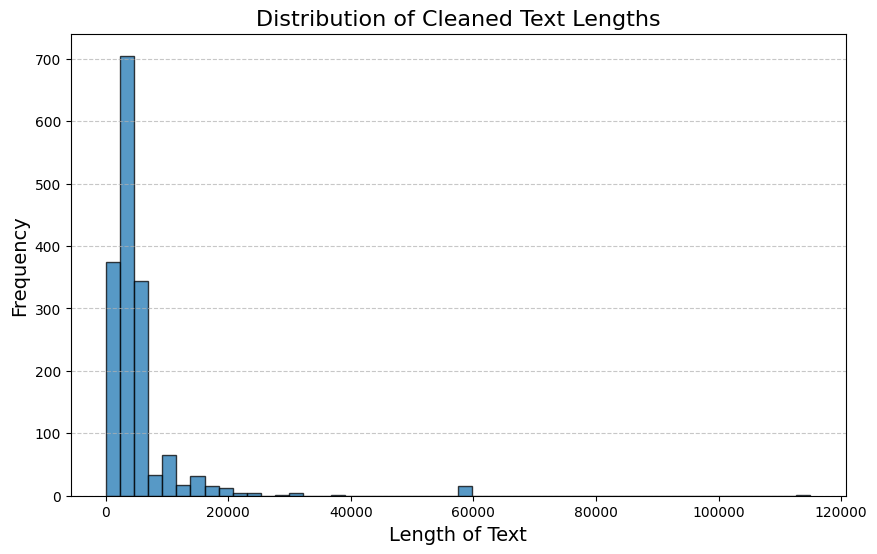

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['cleaned_text_length'], bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribution of Cleaned Text Lengths', fontsize=16)
plt.xlabel('Length of Text', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x: truncate_text(text=x,n=300))


C:\Users\rajbh\AppData\Local\Temp\ipykernel_21752\2600720181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(truncate_text)


In [16]:
df_cleaned.head()

,Unnamed: 0,file_name,text,target,cleaned_text,cleaned_text_length,truncated_text
0,0,document_1000_fuses.pdf,www.littelfuse.com © 2012 Littelfuse • Transpo...,fuses,© littelfuse • transportation product catalog ...,1086,© littelfuse • transportation product catalog ...
2,2,document_1002_cable.pdf,"Product: 1855A \n \n75 Ohm SDI Coax, Mini RG-...",cable,product ohm sdi coax mini rg awg solid bc foil...,4067,product ohm sdi coax mini rg awg solid bc foil...
3,3,document_1003_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312,product ohm wireless transmission coax rg awg ...
4,4,document_1004_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312,product ohm wireless transmission coax rg awg ...
5,5,document_1005_cable.pdf,Product: 8259 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3013,product ohm wireless transmission coax rg awg ...


In [47]:
df_cleaned.to_csv('cleaned_truncated_data.csv')

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the cleaned data
file_path = 'C:\Learning\Parsec\cleaned_truncated_data.csv'

if os.path.exists(file_path):
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in required columns
    df = df.dropna(subset=['cleaned_text', 'target'])
    
    # Split into features and target
    X = df['cleaned_text']
    y = df['target']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # TF-IDF feature extraction
    tfidf = TfidfVectorizer(max_features=800)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)


    # SVM
    svm_model = SVC(kernel='rbf', random_state=42,C=1.0)
    svm_model.fit(X_train_tfidf, y_train)
    y_train_pred_svm = svm_model.predict(X_train_tfidf)
    y_test_pred_svm = svm_model.predict(X_test_tfidf)


    print("\nSVM - Train Data Classification Report:")
    print(classification_report(y_train, y_train_pred_svm))
    print("\nSVM - Test Data Classification Report:")
    print(classification_report(y_test, y_test_pred_svm))

else:
    print(f"The file '{file_path}' does not exist.")


Logistic Regression - Train Data Classification Report:
              precision    recall  f1-score   support

       cable       1.00      1.00      1.00       316
       fuses       1.00      1.00      1.00       448
    lighting       1.00      1.00      1.00       301
      others       1.00      1.00      1.00       238

    accuracy                           1.00      1303
   macro avg       1.00      1.00      1.00      1303
weighted avg       1.00      1.00      1.00      1303


Logistic Regression - Test Data Classification Report:
              precision    recall  f1-score   support

       cable       1.00      0.99      0.99        79
       fuses       1.00      1.00      1.00       112
    lighting       1.00      1.00      1.00        76
      others       0.98      1.00      0.99        59

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326
weighted avg       1.00      1.00      1.00       326


SVM - Train Data 

In [ ]:
f1_score_train =[]
f1_score_validation = []
f1_score_test =  []
trunc_x = [32,64,100,128,150,175,200,256,300,350, 400,450,500]
for i in trunc_x:
    print(i)
    df_cleaned = pd.read_csv('cleaned_data_with_pre_processed.csv')
    df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x : truncate_text(text =x,n=i))
    X = df_cleaned['truncated_text']
    y = df_cleaned['target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    df_test = pd.read_csv('cleaned_truncated_data_test.csv')

    df_test['truncated_text'] = df_test['cleaned_text'].apply(lambda x : truncate_text(text =x,n=i))
    X_fin_test = df_test['truncated_text']
    y_fin_test = df_test['target']

    # TF-IDF feature extraction
    tfidf = TfidfVectorizer(max_features=800) 
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)


    # SVM
    # svm_model = SVC(kernel='linear', random_state=42)
    svm_model = SVC(kernel='rbf', random_state=42, C=0.1)
    svm_model.fit(X_train_tfidf, y_train)

    y_train_pred_svm = svm_model.predict(X_train_tfidf)
    y_test_pred_svm = svm_model.predict(X_test_tfidf)
    

    X_fin_test_tfidf = tfidf.transform(X_fin_test)
    y_fin_test_pred_svm = svm_model.predict(X_fin_test_tfidf)
    
    f1_score_train.append(f1_score(y_train, y_train_pred_svm, average='weighted'))
    f1_score_validation.append(f1_score(y_test, y_test_pred_svm, average='weighted'))
    f1_score_test.append(f1_score(y_fin_test, y_fin_test_pred_svm, average='weighted'))
    print('complete')

In [26]:
df_cleaned = pd.read_csv('cleaned_data_with_pre_processed.csv')
df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x : truncate_text(text =x,n=300))
X = df_cleaned['truncated_text']
y = df_cleaned['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df_test = pd.read_csv('cleaned_truncated_data_test.csv')

df_test['truncated_text'] = df_test['cleaned_text'].apply(lambda x : truncate_text(text =x,n=300))
X_fin_test = df_test['truncated_text']
y_fin_test = df_test['target']

# TF-IDF feature extraction
tfidf = TfidfVectorizer(max_features=800) 
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# SVM
# svm_model = SVC(kernel='linear', random_state=42)
svm_model = SVC(kernel='rbf', random_state=42, C=0.1)
svm_model.fit(X_train_tfidf, y_train)

y_train_pred_svm = svm_model.predict(X_train_tfidf)
y_test_pred_svm = svm_model.predict(X_test_tfidf)


X_fin_test_tfidf = tfidf.transform(X_fin_test)
y_fin_test_pred_svm = svm_model.predict(X_fin_test_tfidf)

f1_score_train = f1_score(y_train, y_train_pred_svm, average='weighted')
f1_score_validation = f1_score(y_test, y_test_pred_svm, average='weighted')
f1_score_test = f1_score(y_fin_test, y_fin_test_pred_svm, average='weighted')

print('f1_score_train : ',f1_score_train)
print('f1_score_validation : ',f1_score_validation)
print('f1_score_test : ',f1_score_test)

TypeError: truncate_text() got an unexpected keyword argument 'n'

In [20]:
model_path = './svm_model.joblib'
tfidf_path = './tfidf_vectorizer.joblib'
joblib.dump(svm_model, model_path)
joblib.dump(tfidf, tfidf_path)
print(f"SVM model saved to {model_path}.")
print(f"TF-IDF vectorizer saved to {tfidf_path}.")

SVM model saved to ./svm_model.joblib.
TF-IDF vectorizer saved to ./tfidf_vectorizer.joblib.


In [21]:
import joblib

# Load the model and vectorizer
model_path = './svm_model.joblib'
tfidf_path = './tfidf_vectorizer.joblib'
svm_model = joblib.load(model_path)
tfidf_vectorizer = joblib.load(tfidf_path)

def predict_text_category(text):
    """
    Predict the category of a given text using the trained SVM model.
    Args:
        text (str): Input text to classify.
    Returns:
        str: Predicted category.
    """
    try:
        # Preprocess the text using the TF-IDF vectorizer
        text_tfidf = tfidf_vectorizer.transform([text])
        
        # Predict the category
        prediction = svm_model.predict(text_tfidf)
        return prediction[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage
sample_text = "Example cleaned text from a document."
predicted_category = predict_text_category(sample_text)
print(f"Predicted Category: {predicted_category}")


Predicted Category: others
